# 1. Installation

In [4]:
!pip install rdkit
import rdkit

# 2. SMILES, molecules, their atoms and bonds

**2.1 How to create a molecule from a SMILES**

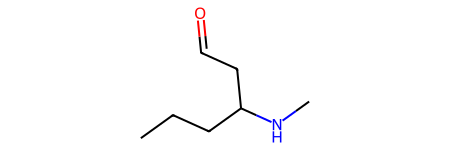

In [54]:
from rdkit import Chem
m = Chem.MolFromSmiles('CNC(CC=O)CCC')
m

**2.2 Back to chemical formula from smiles**

In [34]:
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
print(CalcMolFormula(m))

C7H15NO


2.3 Add hydrogen atoms

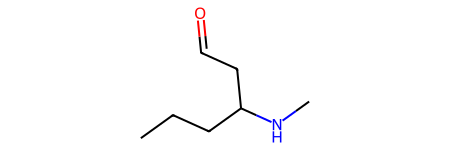

In [65]:
from rdkit.Chem.rdmolops import AddHs
mH = AddHs(m)
# run both versions and see the difference
m
#mH

**2.3 List atoms**

In [66]:
for atom in m.GetAtoms():
  print(atom.GetIdx(), atom.GetSymbol())

0 C
1 N
2 C
3 C
4 C
5 O
6 C
7 C
8 C


**2.4 Count atoms by element type**

In [57]:
atom_type_order = ['C', 'O', 'N', 'H', 'S', 'P', 'F', 'Cl', 'Br', 'I']
atom_counts = [0 for atom_type in atom_type_order]
for atom in mH.GetAtoms():
  element = atom.GetSymbol()
  if element in atom_type_order:
    atom_counts[atom_type_order.index(element)] += 1
print(atom_counts)

[7, 1, 1, 15, 0, 0, 0, 0, 0, 0]


**2.5 How to list all bonds in a molecule**

In [69]:
for bond in m.GetBonds():
  ai = bond.GetBeginAtom()
  aj = bond.GetEndAtom()
  print(ai.GetIdx(), ai.GetSymbol(), aj.GetIdx(), aj.GetSymbol(), bond.GetBondType())


0 C 1 N SINGLE
1 N 2 C SINGLE
2 C 3 C SINGLE
3 C 4 C SINGLE
4 C 5 O DOUBLE
2 C 6 C SINGLE
6 C 7 C SINGLE
7 C 8 C SINGLE


# 3. Functional groups aka Molecular fragments

**3.2 List all functions that RDKit defines for detecting functional groups**

In [33]:
import rdkit.Chem.Fragments
from inspect import getmembers, isfunction

# for fn in getmembers(rdkit.Chem.Fragments, isfunction):
#   if str(fn[0]).startswith('fr_'):
#     print(fn[0])
# Now store these funcctions on a list
frag_functions = [fn for fn in getmembers(rdkit.Chem.Fragments, isfunction) if str(fn[0]).startswith('fr_')]
print(f"found {len(frag_functions)} functions that describe molecular fragments")

#print(frag_functions)


found 85 functions that describe molecular fragments


**3.3. Show fragments in a molecule**

fr_C_O 2
fr_C_O_noCOO 2
fr_NH1 1
fr_aldehyde 2
fr_benzene 1


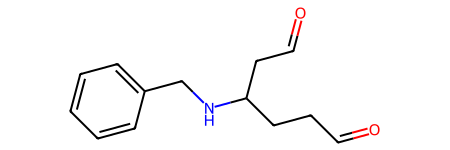

In [72]:
m2 = Chem.MolFromSmiles('c1ccccc1CNC(CC=O)CCC=O')

for fn in frag_functions:
  if fn[1](m2): print (fn[0], fn[1](m2))
m2

# 4. Molecular descriptors

**4.1 Example descriptor - molecular mass**

129.1153641
205.146664228


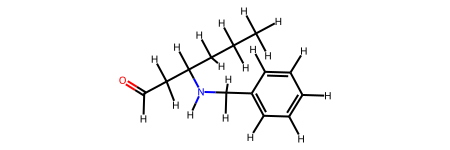

In [63]:
from rdkit.Chem import rdMolDescriptors
print(rdMolDescriptors.CalcExactMolWt(m))

# add hydrogens and see what happes
from rdkit.Chem.rdmolops import AddHs
m2H = AddHs(m2)
print(rdMolDescriptors.CalcExactMolWt(m2H))
m2H

**4.2 Compute all descriptors available for a molecule**

In [43]:

from rdkit.Chem import rdMolDescriptors

mol = Chem.MolFromSmiles('c1ccccc1')
properties = rdMolDescriptors.Properties()
for name, value in zip(properties.GetPropertyNames(), properties.ComputeProperties(mol)):
  print(name, value)

exactmw 78.046950192
amw 78.11399999999999
lipinskiHBA 0.0
lipinskiHBD 0.0
NumRotatableBonds 0.0
NumHBD 0.0
NumHBA 0.0
NumHeavyAtoms 6.0
NumAtoms 12.0
NumHeteroatoms 0.0
NumAmideBonds 0.0
FractionCSP3 0.0
NumRings 1.0
NumAromaticRings 1.0
NumAliphaticRings 0.0
NumSaturatedRings 0.0
NumHeterocycles 0.0
NumAromaticHeterocycles 0.0
NumSaturatedHeterocycles 0.0
NumAliphaticHeterocycles 0.0
NumSpiroAtoms 0.0
NumBridgeheadAtoms 0.0
NumAtomStereoCenters 0.0
NumUnspecifiedAtomStereoCenters 0.0
labuteASA 37.43140311949697
tpsa 0.0
CrippenClogP 1.6866
CrippenMR 26.441999999999993
chi0v 3.464101615137755
chi1v 2.0000000000000004
chi2v 0.6666666666666671
chi3v 0.6666666666666671
chi4v 0.38490017945975075
chi0n 3.464101615137755
chi1n 2.0000000000000004
chi2n 0.6666666666666671
chi3n 0.6666666666666671
chi4n 0.38490017945975075
hallKierAlpha -0.78
kappa1 3.4115708812260532
kappa2 1.6057694396735218
kappa3 0.5823992601400448
Phi 0.9130327103921437
